In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib

In [3]:
#execute if source is csv
df = pd.read_csv (r'C:\Users\aron\Google Drive\BA\thesis\data_analysis\Database_AllParticipants_av_experiment_122522_2021-04-09_19h22.32_f14f0700-9968-11eb-a6c2-ac1f6b405aea.csv')
df.head()

,videoPath,SJ_trials_skip.thisRepN,SJ_trials_after.thisIndex,SJ_trials_between.ran,SJ_trials_before.thisRepN,training.thisTrialN,trials.thisTrialN,SJ_trials_between.thisIndex,block_counter_sj,attribute2,...,SJ_trials_before.thisTrialN,training.thisRepN,group,s_adjust.ran,s_adjust.thisN,fill_attribute,cont_4.rt,frameRate,expName,cont_6.rt
0,﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1.0,0.0,NaN,NaN,59.898173,av_experiment,NaN
1,﻿choice_videos/4_072.mp4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,hübsch,...,NaN,0.0,0,NaN,NaN,alt,0.95177,59.898173,av_experiment,NaN
2,﻿choice_videos/1_016.mp4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,frech,...,NaN,0.0,0,NaN,NaN,rüde,NaN,59.898173,av_experiment,NaN
3,﻿choice_videos/3_011.mp4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,träge,...,NaN,0.0,0,NaN,NaN,alt,NaN,59.898173,av_experiment,NaN
4,﻿choice_videos/2_055.mp4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,klug,...,NaN,0.0,0,NaN,NaN,dick,NaN,59.898173,av_experiment,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Columns: 102 entries, videoPath to cont_6.rt
dtypes: float64(63), int64(5), object(34)
memory usage: 629.7+ KB


In [5]:
list(df.columns)

['videoPath',
 'SJ_trials_skip.thisRepN',
 'SJ_trials_after.thisIndex',
 'SJ_trials_between.ran',
 'SJ_trials_before.thisRepN',
 'training.thisTrialN',
 'trials.thisTrialN',
 'SJ_trials_between.thisIndex',
 'block_counter_sj',
 'attribute2',
 's_adjust.thisRepN',
 'SJ_trials_skip.thisTrialN',
 'response_distortion.keys',
 'cont_6.keys',
 'response_distortion.rt',
 'browser',
 'key_resp.rt',
 'SJ_trials_between.thisN',
 'corrAns',
 'SJ_trials_skip.thisIndex',
 's_adjust.thisTrialN',
 'exit.rt',
 'SJ_trials_before.thisIndex',
 'cont_0.rt',
 'block_counter_choice',
 'trials.thisN',
 'cont_5.keys',
 'cont_7.keys',
 'id',
 'key_resp.keys',
 'psychopyVersion',
 'echo',
 'choice_response.keys',
 'latency',
 'response_sync.corr',
 'item',
 'response_sync.rt',
 'SJ_trials_skip.ran',
 'exit.keys',
 'trial_counter_sj',
 'cont_3.rt',
 'trial_counter_choice',
 'SJ_trials_between.thisTrialN',
 'OS',
 'training.ran',
 'SJ_trials_after.thisRepN',
 'imagePath2',
 'cont_0.keys',
 '__participant',
 'xRes

Text(0.5, 1.0, 'Distribution of Participants over Groups')

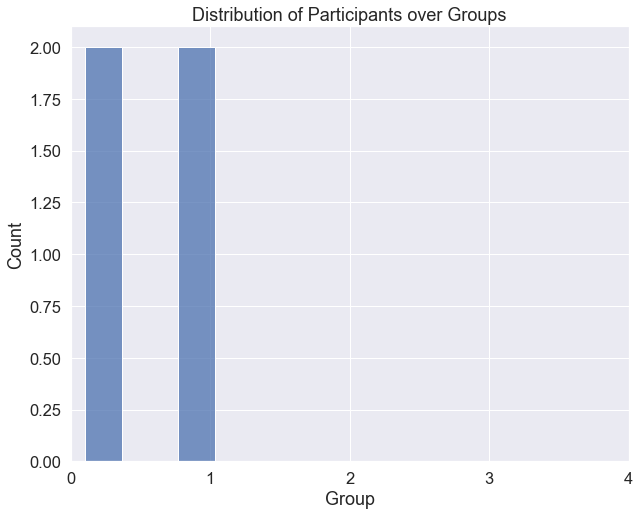

In [18]:
#count participants
parts = df['participant'].unique()
print('Number of participants: ', len(parts))
print('Their IDs: ', parts)
#group distribution
groups=[]
for p in parts:
    group = df[df['participant'] == p]['group'].median()
    groups.append(group)
groups

groupnames = [0,1,2,3,4]

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


sns.histplot( data=groups, multiple="dodge", shrink=.8).set_xticks(groupnames)

# Change Axis labels:

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Participants over Groups')

Text(0.5, 1.0, 'Distribution of Browsers over Participant')

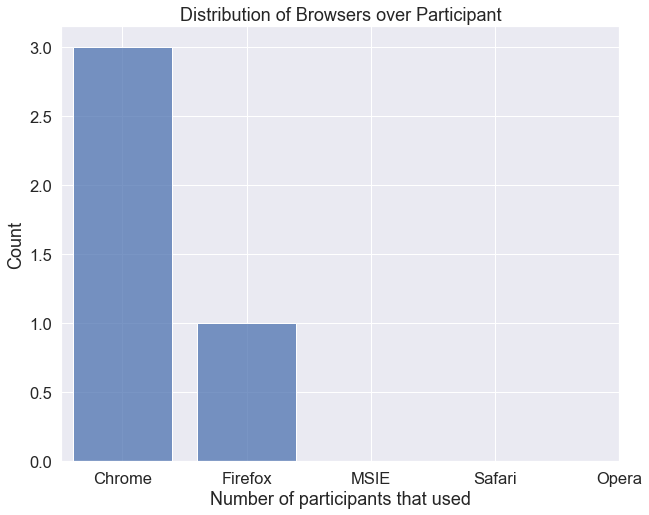

In [17]:
#browser distribution
browsers=[]
for p in parts:
    browser = df[df['participant'] == p]['browser'].any()
    browsers.append(browser)
browsers

browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


sns.histplot( data=browsers, multiple="dodge", shrink=.8).set_xticks(browsernames)
plt
# Change Axis labels:

plt.xlabel('Number of participants that used')
plt.ylabel('Count')
plt.title('Distribution of Browsers over Participants')

Text(0.5, 1.0, 'Response times over conditions in choice trial')

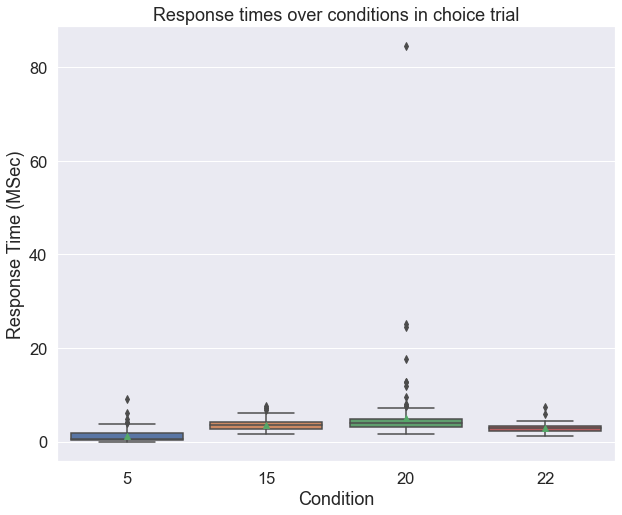

In [20]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.boxplot(y='choice_response.rt', x="participant",
              data=df,
           showmeans=True)

# Change Axis labels:
plt.xlabel('Condition')
plt.ylabel('Response Time (MSec)')
plt.title('Response times over different conditions')
plt.title('Response times over conditions in choice trial')

Text(0.5, 1.0, 'CCorrect Ratio over Participants in choice trial')

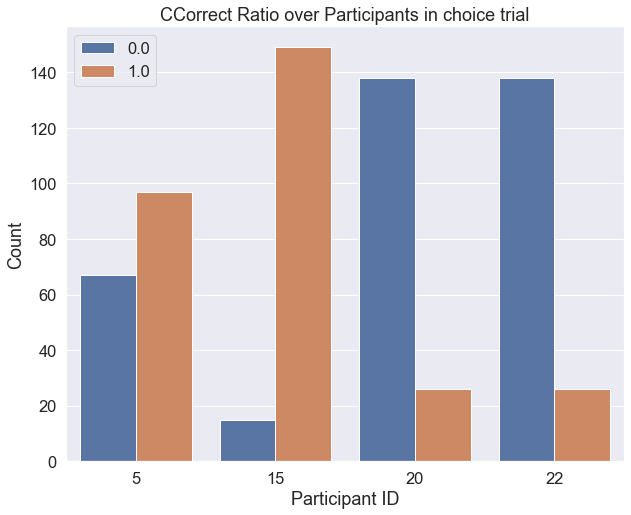

In [23]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.countplot(hue='choice_response.corr', 
              x="participant",
              data=df)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Participant ID')
plt.ylabel('Count')
plt.title('Correct Ratio over Participants in choice trial')

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

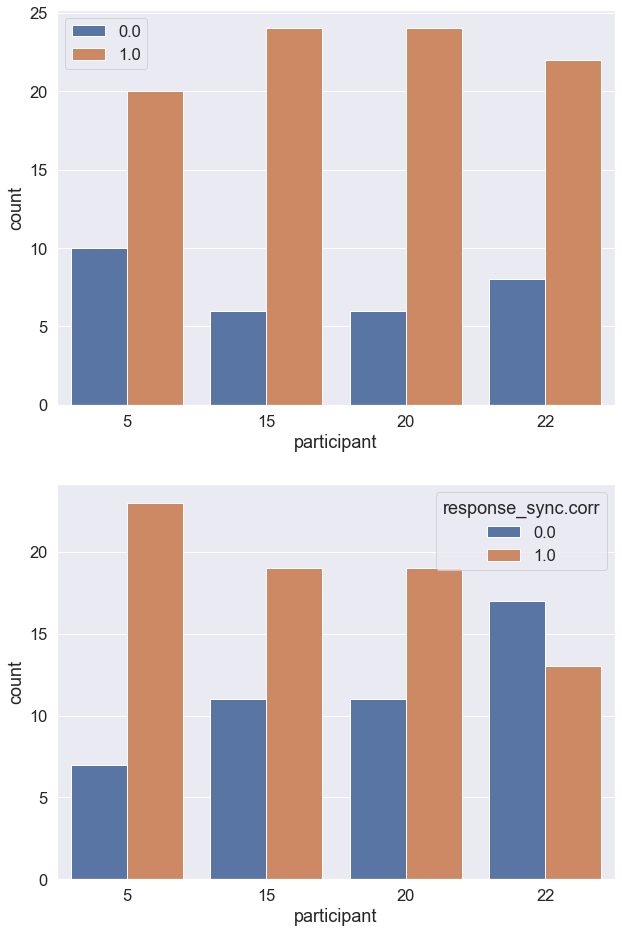

In [37]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(10, 16)

# Increase font size
sns.set(font_scale=1.5)

dist = sns.countplot(hue= 'response_distortion.corr',
              x="participant",
               ax = axes[0],
              data=df)

sync = sns.countplot(hue= 'response_sync.corr',
              x="participant",
               ax = axes[1],
              data=df)
# Change Axis labels:
dist.legend(loc = 'upper left')
dist.xlabel('Participant ID')
dist.ylabel('Count')
dist.title('Distortion Correct')

plt.suptitle('Correct Ratio over Participants in SJ trial')

sync.legend(loc = 'upper left')
sync.xlabel('Participant ID')
sync.ylabel('Count')
sync.title('Synchronicity Correct')